# importing libraries


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
def get_title(soup):
    try:
        product_title = single_product_soup.find("span", attrs={'id': 'productTitle'}).text.strip()
    except AttributeError:
       product_title = ""
    return product_title

In [3]:
def get_price(soup):
    try:
       product_price = single_product_soup.find("span", attrs={'class':  'a-offscreen'}).text
    except AttributeError:
       product_price = ""
    return product_price

In [21]:
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36'})
for i in range(1,5):
 URL = 'https://www.amazon.in/s?k=airpods'
page = requests.get(URL, headers = HEADERS)
page

<Response [200]>

In [22]:
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [23]:
links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
links_list = []
for link in links:
    # Check if the link already starts with "https://"
    # If not, prepend "https://www.amazon.in", otherwise keep it as it is
    if not link.get("href").startswith("https://"):
        links_list.append("https://www.amazon.in"  +  link.get("href"))
    else:
        links_list.append(link.get("href"))
links_list

['https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0MDY4NjI3NDI0OTMwMDE2OjE3MzAyNzY2NjM6c3BfYXRmOjMwMDMzNDI2MDQ0MzIzMjo6MDo6&url=%2FApple-Bluetooth-Headphones-Personalised-Effortless%2Fdp%2FB0DGJLL7V1%2Fref%3Dsr_1_1_sspa%3Fdib%3DeyJ2IjoiMSJ9.QM9-y6uF2Di67zm5089PVgb0cZ2YD_mq9xbylTS21nAzjBJvENoN_mRSEspy6nFW9qqzBWSeTR8rEe37wL2ptJ6-W9DkFPqLX-n1o-WF57e0ESKQGOj4ieKqUFlAoM7XBrrGeae8OMqy8NFwFM9jVsNTUi_OEiI60hdWgyLEOjxJE9iimy2kG9cp7CRzdBNS0rlD_rnRySpRXs_92ic7cuLAiAUsGadoqntHWcQzcak.jrrvYyVe48ZC1a9yzwjJ6DnL-5eByWAm3p8As-wT_Go%26dib_tag%3Dse%26keywords%3Dairpods%26qid%3D1730276663%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo0MDY4NjI3NDI0OTMwMDE2OjE3MzAyNzY2NjM6c3BfYXRmOjIwMDU1OTk4ODkzMTAzOjowOjo&url=%2FNew-Apple-AirTag-4-Pack%2Fdp%2FB0935JRJ59%2Fref%3Dsr_1_2_sspa%3Fdib%3DeyJ2IjoiMSJ9.QM9-y6uF2Di67zm5089PVgb0cZ2YD_mq9xbylTS21nAzjBJvENoN_mRSEspy6nFW9qqzBWSeTR8rEe37wL2ptJ6-W9DkFPqLX-n1o-WF57e0ESKQGOj4ieKqUFlAoM7XBrrGeae8OMqy8NFwFM9

In [24]:
d = {"title":[], "price":[]}
for link in links_list:
    product_page = requests.get(link, headers = HEADERS)
    single_product_soup = BeautifulSoup(product_page.content, 'html.parser')
    d['title'].append(get_title(single_product_soup))
    d['price'].append(get_price(single_product_soup))
d

{'title': ['Apple AirPods 4 Wireless Earbuds, Bluetooth Headphones, Personalised Spatial Audio, Sweat and Water Resistant, USB-C Charging Case, H2 Chip, Up to 30 Hours of Battery Life, Effortless Setup for iPhone',
  'New Apple AirTag 4 Pack',
  'Apple AirPods 4 Wireless Earbuds, Bluetooth Headphones, Personalised Spatial Audio, Sweat and Water Resistant, USB-C Charging Case, H2 Chip, Up to 30 Hours of Battery Life, Effortless Setup for iPhone',
  'boAt Airdopes 311 Pro w/Up to 50 HRS Playtime, ASAP Charge(10min=150 Mins), Dual Mics w/ENx Tech, Transparent ID, 50 ms Beast Mode, IPX4 Truly Wireless in Ear Earbuds, TWS Ear Buds (Dusk Blue)',
  'boAt Airdopes 311 Pro w/Up to 50 HRS Playtime, ASAP Charge(10min=150 Mins), Dual Mics w/ENx Tech, Transparent ID, 50 ms Low-Latency Beast Mode, IPX4 Truly Wireless in Ear Ear Buds(Space Grey)',
  'boAt Airdopes Atom 81 Pro Truly Wireless in Ear Ear Buds w/ 100hrs of Playtime, 4 Mics with ENx, Beast Mode with 50ms Low Latency, 13mm Drivers, IWP Tec

In [25]:
product_page = requests.get(link, headers = HEADERS)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
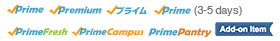
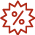

In [26]:
single_product_soup = BeautifulSoup(product_page.content, 'html.parser')
single_product_soup

In [27]:
product_title = single_product_soup.find("span", attrs={'id': 'productTitle'}).text.strip()
print(product_title)
product_price = single_product_soup.find("span", attrs={'class':  'a-offscreen'}).text
print(product_price)

Apple EarPods with Lightning Connector
₹1,599.00


In [28]:
amazon_data_frame = pd.DataFrame.from_dict(d)
amazon_data_frame['title'].replace('', np.nan, inplace=True)
amazon_data_frame = amazon_data_frame.dropna(subset=['title'])
amazon_data_frame.to_csv("amazon_data.csv", header=True, index=False)

C:\Users\sange\AppData\Local\Temp\ipykernel_28400\288853954.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  amazon_data_frame['title'].replace('', np.nan, inplace=True)


In [29]:
amazon_data_frame

,title,price
0,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...","₹12,900.00"
1,New Apple AirTag 4 Pack,"₹9,999.00"
2,"Apple AirPods 4 Wireless Earbuds, Bluetooth He...","₹12,900.00"
3,"boAt Airdopes 311 Pro w/Up to 50 HRS Playtime,...",₹999.00
4,"boAt Airdopes 311 Pro w/Up to 50 HRS Playtime,...",₹799.00
5,boAt Airdopes Atom 81 Pro Truly Wireless in Ea...,₹999.00
6,boAt Airdopes 141 Bluetooth Truly Wireless in ...,₹949.00
7,boAt Airdopes 800 True Wireless in Ear Ear Bud...,"₹1,499.00"
8,ZEBRONICS ZEB-SOUND BOMB 1 TWS Earbuds with BT...,₹598.00
9,boAt Airdopes 280 ANC Truly Wireless in Ear Ea...,"₹1,199.00"
